In [1]:
import numpy as np
import pandas as pd
import pyodbc

In [2]:


# Configuración de la conexión a la base de datos SQL Server
server = '192.168.1.166'
database = 'URG_Churn_Model'
username = 'dbuser'
password = 'Tech.BI.1387'
driver = '{ODBC Driver 17 for SQL Server}'  # Asegúrate de tener el controlador correcto instalado


# Establecer la cadena de conexión a la base de datos
conn_str = f"DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password}"

# Establecer la conexión con la base de datos
conn = pyodbc.connect(conn_str)

# Crear un cursor para ejecutar consultas SQL
cursor = conn.cursor()

# Nombre de la tabla en la base de datos donde se importará el archivo de Excel
table_name = 'Train'

# Eliminar la tabla si ya existe (opcional)
query = f"SELECT * FROM  {table_name}"

df = pd.read_sql(query, conn)
conn.close()

#print("¡Archivo de Excel importado correctamente en la base de datos!")


C:\Users\jcalabozo\AppData\Local\Temp\ipykernel_8704\3372889995.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304337 entries, 0 to 304336
Data columns (total 39 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   NumeroDeAfiliado                 304337 non-null  int64 
 1   Secuencia                        304337 non-null  object
 2   CodigoDeSucursal                 304337 non-null  object
 3   ApellidoAfiliado                 304337 non-null  object
 4   AnioIndicador                    304337 non-null  int64 
 5   MesIndicador                     304337 non-null  object
 6   TipoAfiliacion                   304337 non-null  object
 7   DescripcionDeSexo                303647 non-null  object
 8   EstadoMesIndicadores             304337 non-null  object
 9   Convenio                         304337 non-null  object
 10  DescripcionDeTipoDePago          304314 non-null  object
 11  DescripcionDeInstitucionDeCobro  294823 non-null  object
 12  UsoServicioAlgun

In [4]:
df['QIntegrantes']=df['QIntegrantes'].astype('Int64')

In [5]:
df['DescripcionDeTipoDePago']=df['DescripcionDeTipoDePago'].fillna('N/A')


In [6]:
df['DescripcionDeTipoDePago'].unique()

array(['Convenio', 'Débito tarjeta', 'Ventanilla', 'Débito bancario',
       'Déb. Recibo Sueldo', 'N/A'], dtype=object)

In [7]:
df['DescripcionDeInstitucionDeCobro']=df['DescripcionDeInstitucionDeCobro'].fillna('N/A')


In [8]:
df['DescripcionDeInstitucionDeCobro'].unique()

array(['Convenio', 'TARJETA NARANJA- CORDOBA', 'N/A', 'NARANJA  AL 8%',
       'COELSA', 'MASTERCARD', 'VISA', 'CABAL', 'CORDOBESA',
       'CMR FALABELLA ROSARIO', 'ACH S.A. - CORDOBA', 'COELSA - CORDOBA',
       'VISA - CORDOBA', 'MASTERCARD - CORDOBA', 'NARANJA',
       'AMERICAN EXPRESS', 'CABAL - CORDOBA', 'AMERICAN EXPRESS- CORDOBA',
       'BBVA Francés - Rosario', 'BBVA Francés - Córdoba',
       'Empleados  Municipalidad de  Rosario', 'NATIVA NACION - CORDOBA',
       'DINERS', 'TARJETA GRUPAR CORDOBA', 'NATIVA NACION', 'SEP',
       'DASPU', 'DINERS - CORDOBA', 'UEPC', 'EFICAZ',
       'CMR FALABELLA CORDOBA', 'Mutual Ley 5110',
       'Asoc Mutual Argentina Nueva', 'MACRO EX SUQUIA',
       'O.Social UNR (Jub.-Pens)', 'MUTUAL CONSEJO DE EDUC VOL II',
       'CMR FALABELLA', 'O.Social UNR (Directos)'], dtype=object)

In [9]:
df['DescripcionDeSexo']=df['DescripcionDeSexo'].fillna('Indefinido')

In [10]:
df['DescripcionDeSexo'].unique()

array(['Femenino', 'Masculino', 'Indefinido'], dtype=object)

In [11]:
# retrieve all labels and store in a list
columnas = df.columns.tolist()

# iterate over the list to print all unique values of each column in the dataframe
for i in columnas:
    print(i,':',df[i].unique())

NumeroDeAfiliado : [680824 680836 680842 ... 549787 658802 658679]
Secuencia : ['1' '0' '3' '2' '5' '4' '6' '7' '38' '9' '8' '10' '11' '14' '15' '17'
 '12' '25' '16' '13' '20' '35' '32' '24' '18' '30' '23' '33' '19' '22'
 '34' '21' '28' '29' '31' '40' '41' '42' '36' '26' '44' '39' '27' '43'
 '37' '46' '45']
CodigoDeSucursal : ['2' '1']
ApellidoAfiliado : ['LENCINAS                      ' 'PRATO                         '
 'VAZQUEZ                       ' ... 'PARROTTI                      '
 'BUASSO                        ' 'VEGA CASAJENAS                ']
AnioIndicador : [2021 2009 2011 2017 2018 2010 2019 2008 2016 2012 2015 2020 2014 2013
 2007 2006]
MesIndicador : ['4' '9' '1' '6' '5' '11' '12' '8' '10' '3' '7' '2']
TipoAfiliacion : ['Voluntario' 'Individual']
DescripcionDeSexo : ['Femenino' 'Masculino' 'Indefinido']
EstadoMesIndicadores : ['Activo' 'Suspendido']
Convenio : ['SUOEM' 'UEPC' 'SinConvenio' 'AMR MUTUAL AFILIADOS'
 'OBRA SOCIAL UNR - ACTIVOS' 'IPAM SIN COSEGURO' 'IPAM R

In [12]:
# Generate descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
NumeroDeAfiliado,304337.0,1085611.971932,406468.988919,2013.0,716370.0,1040413.0,1463447.0,1724201.0
AnioIndicador,304337.0,2016.773928,4.476828,2006.0,2013.0,2018.0,2021.0,2021.0
Edad,304337.0,41.717484,32.907264,0.0,20.0,39.0,60.0,300.0
QIntegrantes,304337.0,3.587273,2.130944,1.0,2.0,3.0,5.0,27.0
QAttAUTOIndividuo,304337.0,4.767422,9.564825,0.0,0.0,1.0,5.0,517.0
QAttCriticasIndividuo,304337.0,0.70141,2.753228,0.0,0.0,0.0,0.0,473.0
QAttOtrosIndividuo,304337.0,0.000273,0.016512,0.0,0.0,0.0,0.0,1.0
CantidadPeriodos,304337.0,966.684383,2915.939467,0.0,0.0,0.0,4.0,9999.0
AntiguedadMeses,304337.0,40.684048,41.390259,0.0,9.0,23.0,62.0,185.0
AntiguedadSinPromo,304337.0,35.579098,42.242089,0.0,4.0,17.0,55.0,185.0


In [27]:
df=df.drop(columns=['NumeroDeAfiliado', 'ApellidoAfiliado'])

In [28]:
# list of numerical features
num_cols = df.select_dtypes(include=np.number).columns
num_cols

Index(['AnioIndicador', 'Edad', 'QIntegrantes', 'QAttAUTOIndividuo',
       'QAttCriticasIndividuo', 'QAttOtrosIndividuo', 'CantidadPeriodos',
       'AntiguedadMeses', 'AntiguedadSinPromo'],
      dtype='object')

In [44]:
# list of categorical features
cat_cols = df.select_dtypes(include=object).columns
cat_cols



Index(['Secuencia', 'CodigoDeSucursal', 'MesIndicador', 'TipoAfiliacion',
       'DescripcionDeSexo', 'EstadoMesIndicadores', 'Convenio',
       'DescripcionDeTipoDePago', 'DescripcionDeInstitucionDeCobro',
       'UsoServicioAlgunaVez', 'ConAtencionAnulada',
       'QAttSeguimientoIndividuo', 'QAttVirtualesIndividuo',
       'CantidadPersonasPagan', 'ISoloAttBanales', 'ISoloAttCr_ticas',
       'ISinAtenciones', 'IConAttAutoyCriticas', 'ISinExpAuto',
       'ISinExpCriticas', 'GSoloAttBanales', 'GSoloAttCr_ticas',
       'GSinAtenciones', 'GConAttAutoyCriticas', 'GSinExpAuto',
       'GSinExpCriticas', 'EstadoMora', 'BajaTarget'],
      dtype='object')

In [15]:
# import matplotlib and seaborn for visualization
from matplotlib import pyplot as plt
import seaborn as sns
import math
# Univariate visualization of categorical features
def categorical_feature_func(cat_cols, data, plot_columnas):
     
     plot_filas = math.ceil(len(cat_cols)/plot_columnas)
     fig, axs = plt.subplots(plot_filas,plot_columnas, figsize=(12*plot_columnas,10*plot_filas))
     
     for index, col in enumerate(cat_cols):
          axs_fila=index // plot_columnas
          axs_col=index % plot_columnas
          sns.countplot( x=col,data=data, ax = axs[axs_fila][axs_col])
          ax=axs[axs_fila][axs_col]
          ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
          ax.tick_params(axis='both', labelsize=20)
          ax.set_xlabel(col, fontsize=20)  
          ax.set_ylabel('Count', fontsize=20)
          



In [16]:
def categorical_feature_func(cat_cols, cross_col, data, plot_columnas):

    plot_filas = math.ceil(len(cat_cols)/plot_columnas)
    fig, axs = plt.subplots(plot_filas,plot_columnas, figsize=(12*plot_columnas,10*plot_filas))
    
    if plot_filas==1:
        for index, col in enumerate(cat_cols):
            pd.crosstab(data[col],data[cross_col]).plot(kind="bar", rot=45, ax = axs[index])
            ax=axs[index]
            ax.tick_params(axis='both', labelsize=20)
            ax.set_xlabel(col, fontsize=20)  
            ax.set_ylabel('Count', fontsize=20)
    else:
        for index, col in enumerate(cat_cols):
            axs_fila = index // plot_columnas
            axs_col = index % plot_columnas
            pd.crosstab(data[col],data[cross_col]).plot( kind="bar", rot=45, ax = axs[axs_fila][axs_col])
            #sns.countplot( x=col,hue=cross_col, data=data, ax = axs[axs_fila][axs_col])
            ax=axs[axs_fila][axs_col]
            ax.tick_params(axis='both', labelsize=20)
            ax.set_xlabel(col, fontsize=20)  
            ax.set_ylabel('Count', fontsize=20)
           


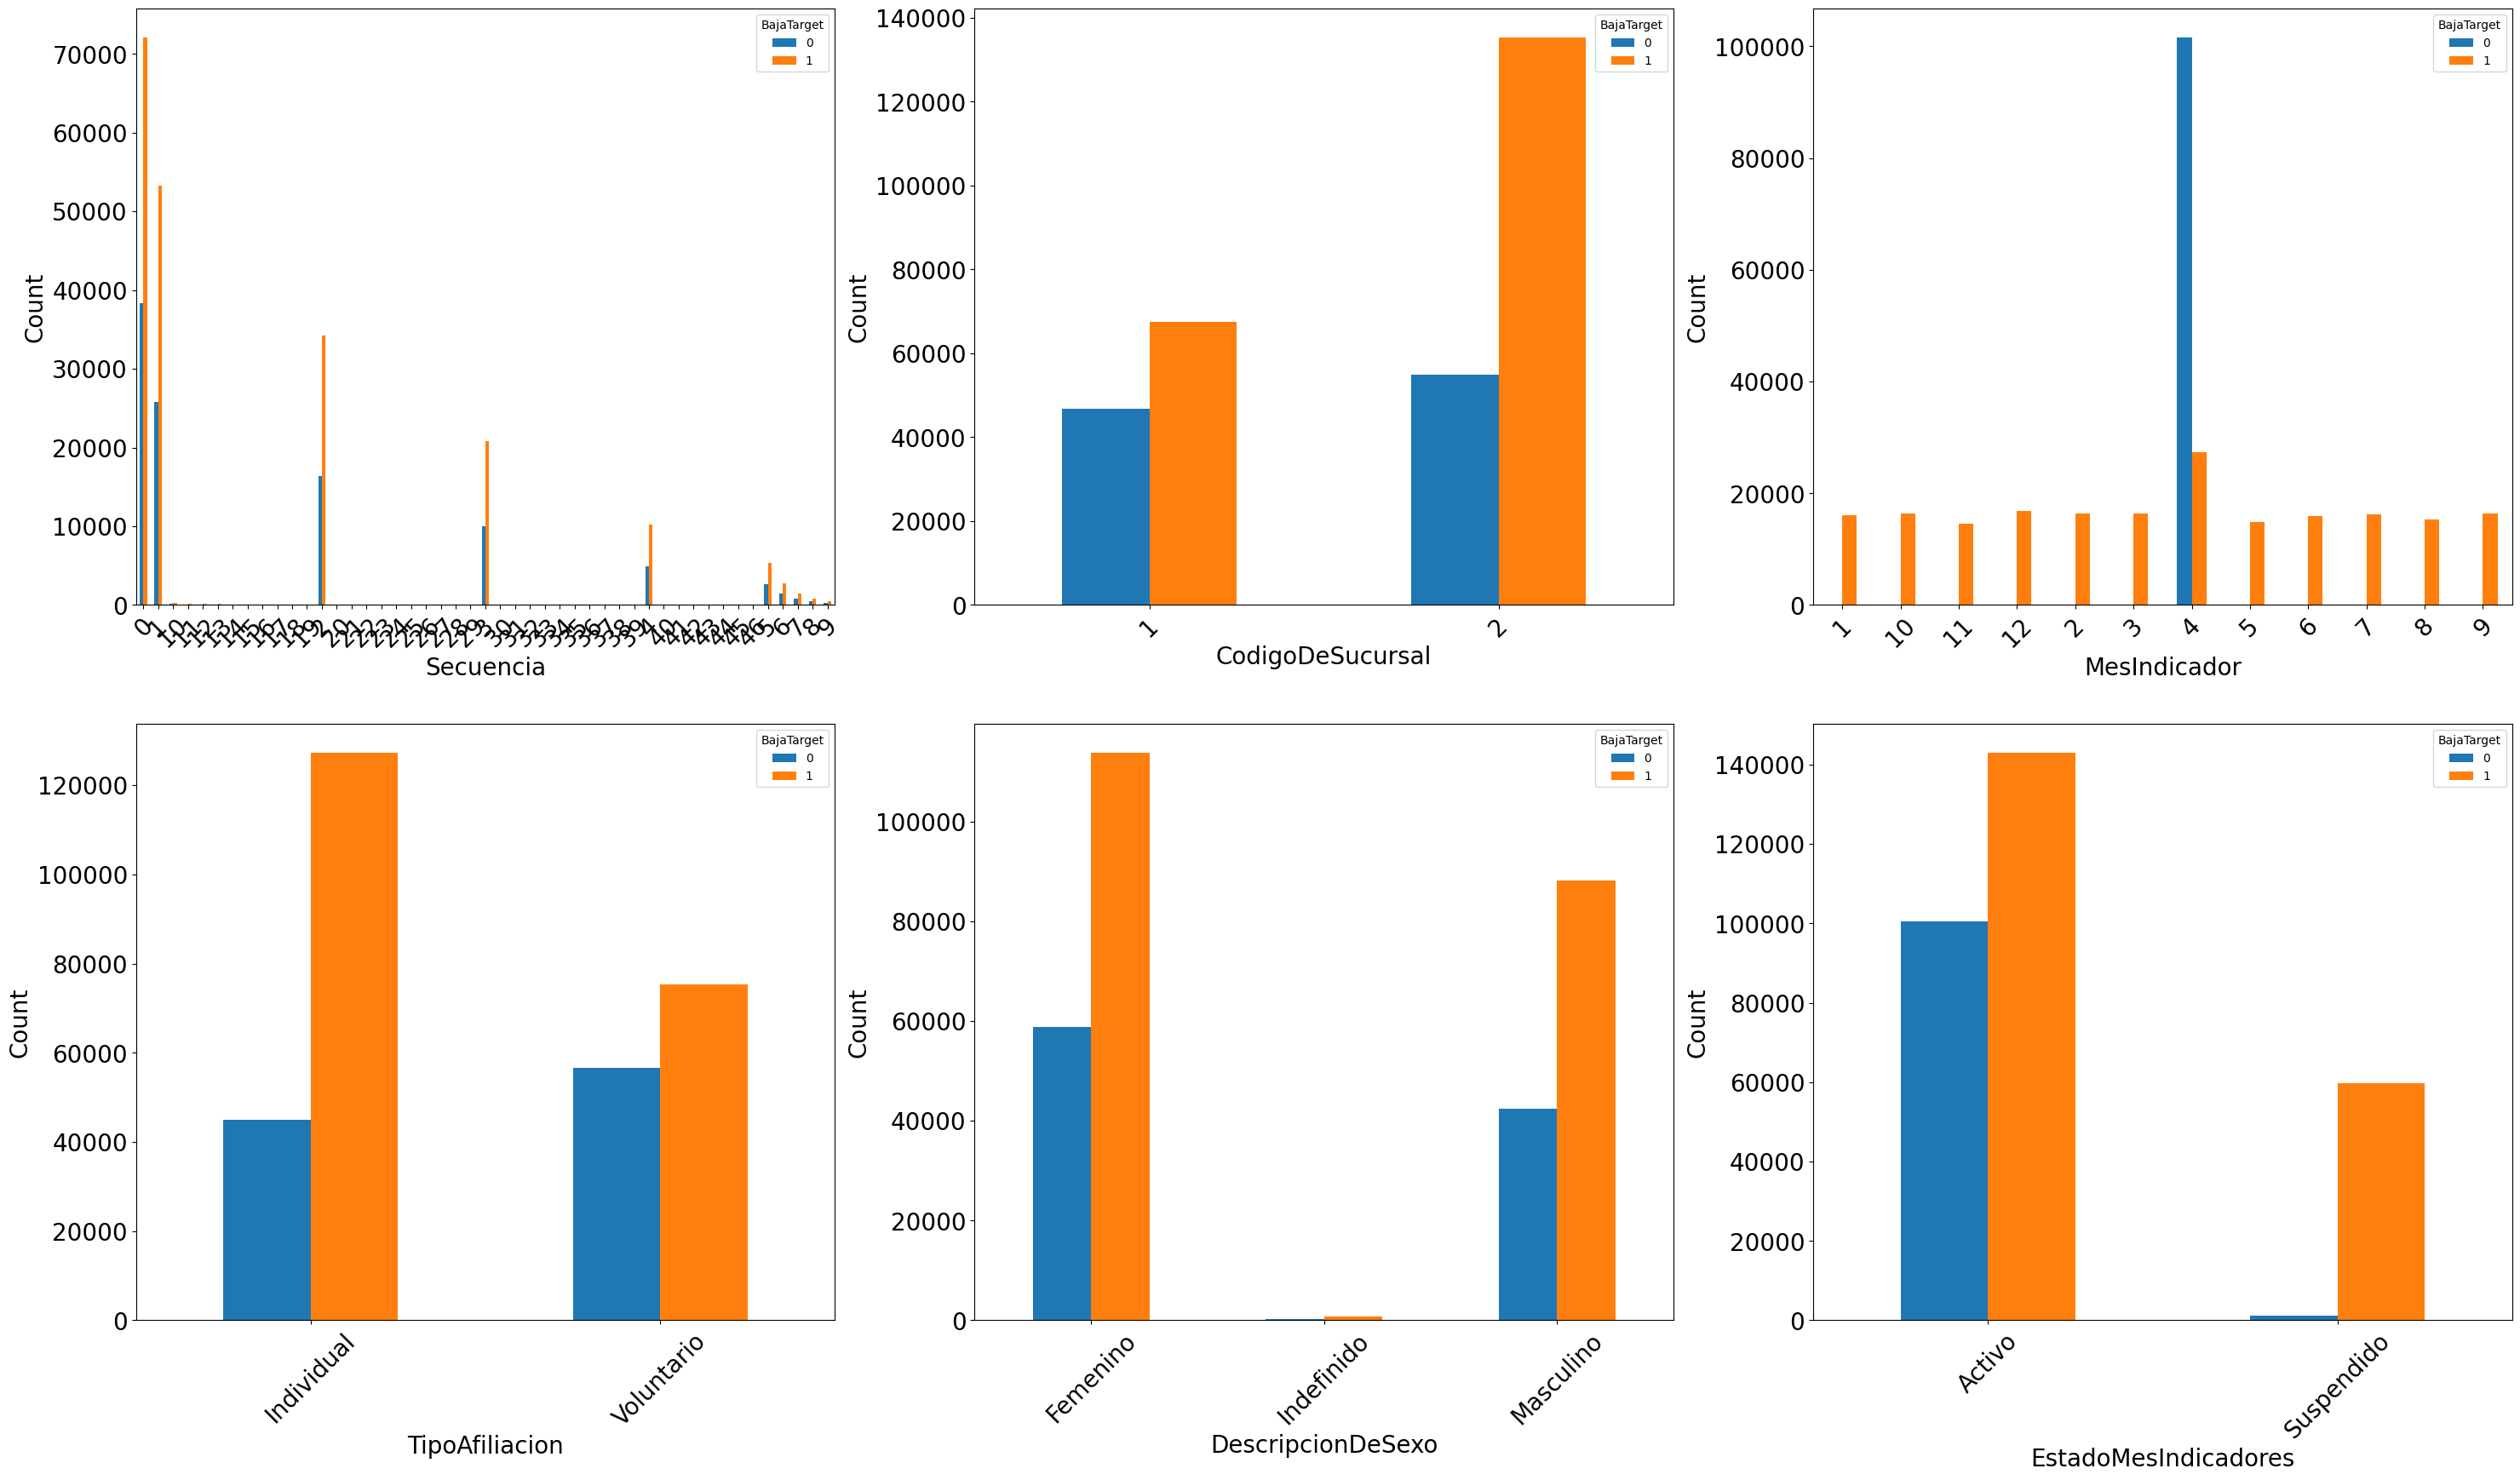

In [40]:
categorical_feature_func(cat_cols[0:6], 'BajaTarget', df, 3)

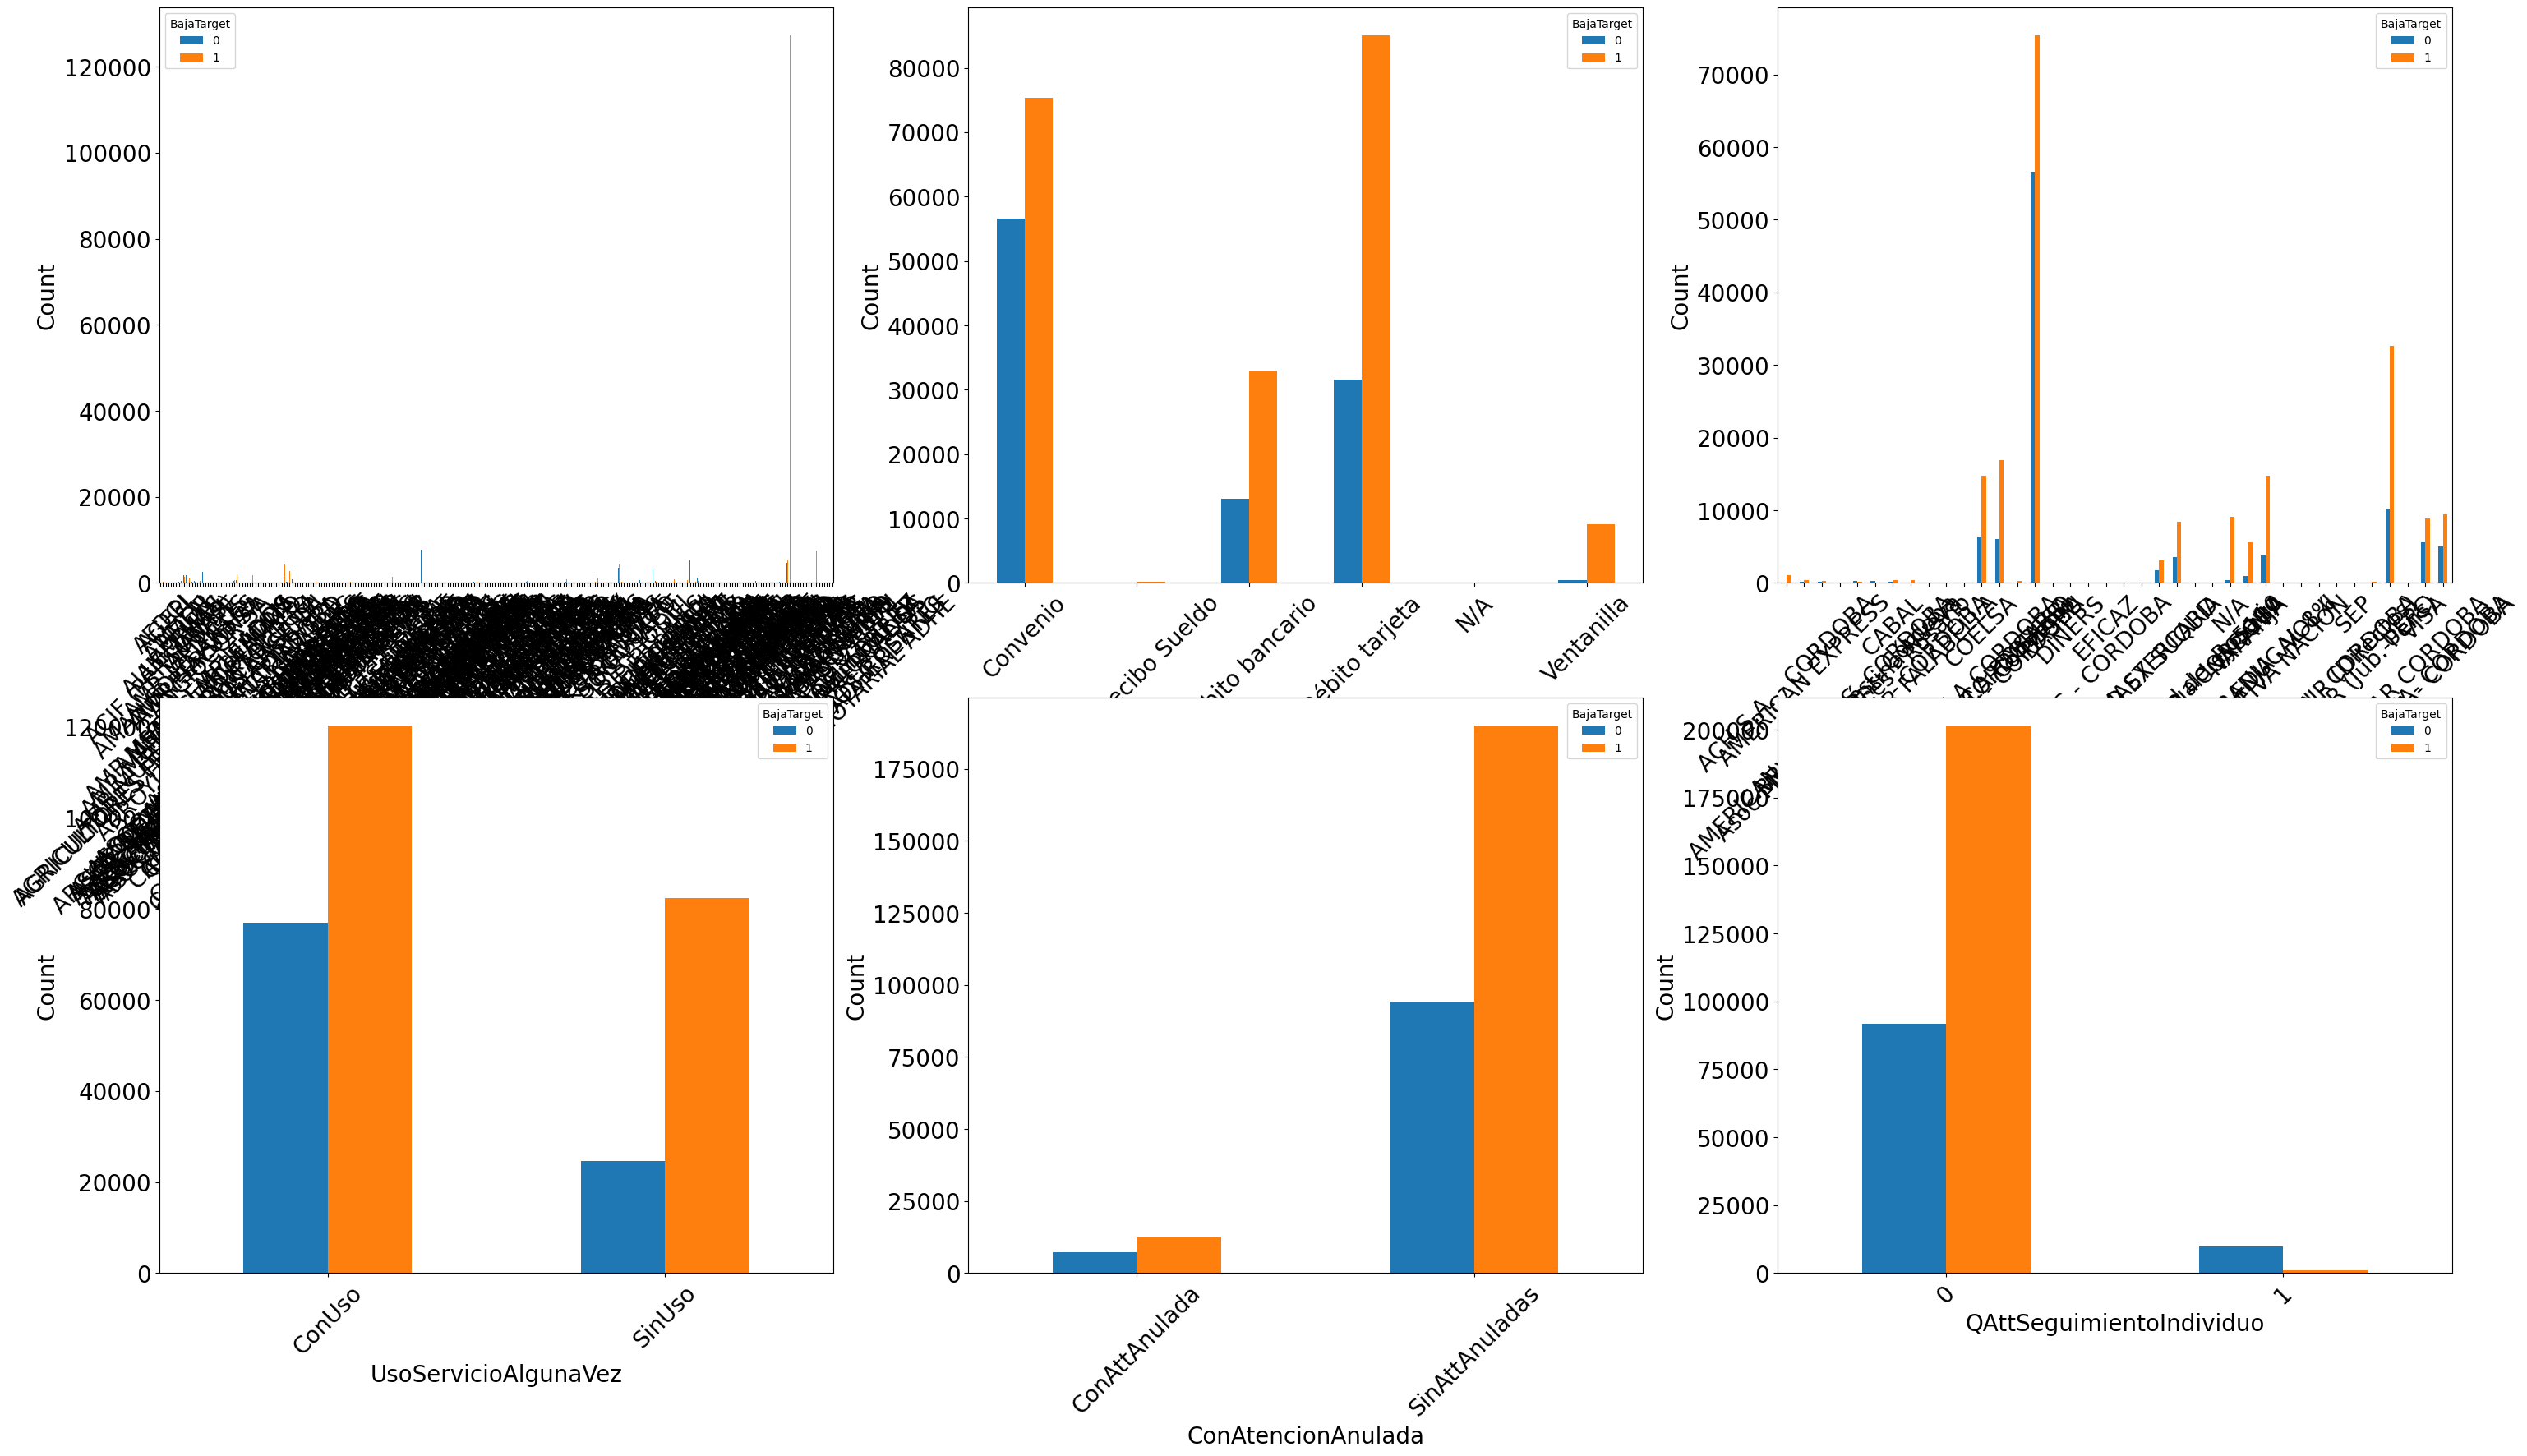

In [47]:
categorical_feature_func(cat_cols[6:12], 'BajaTarget', df, 3)

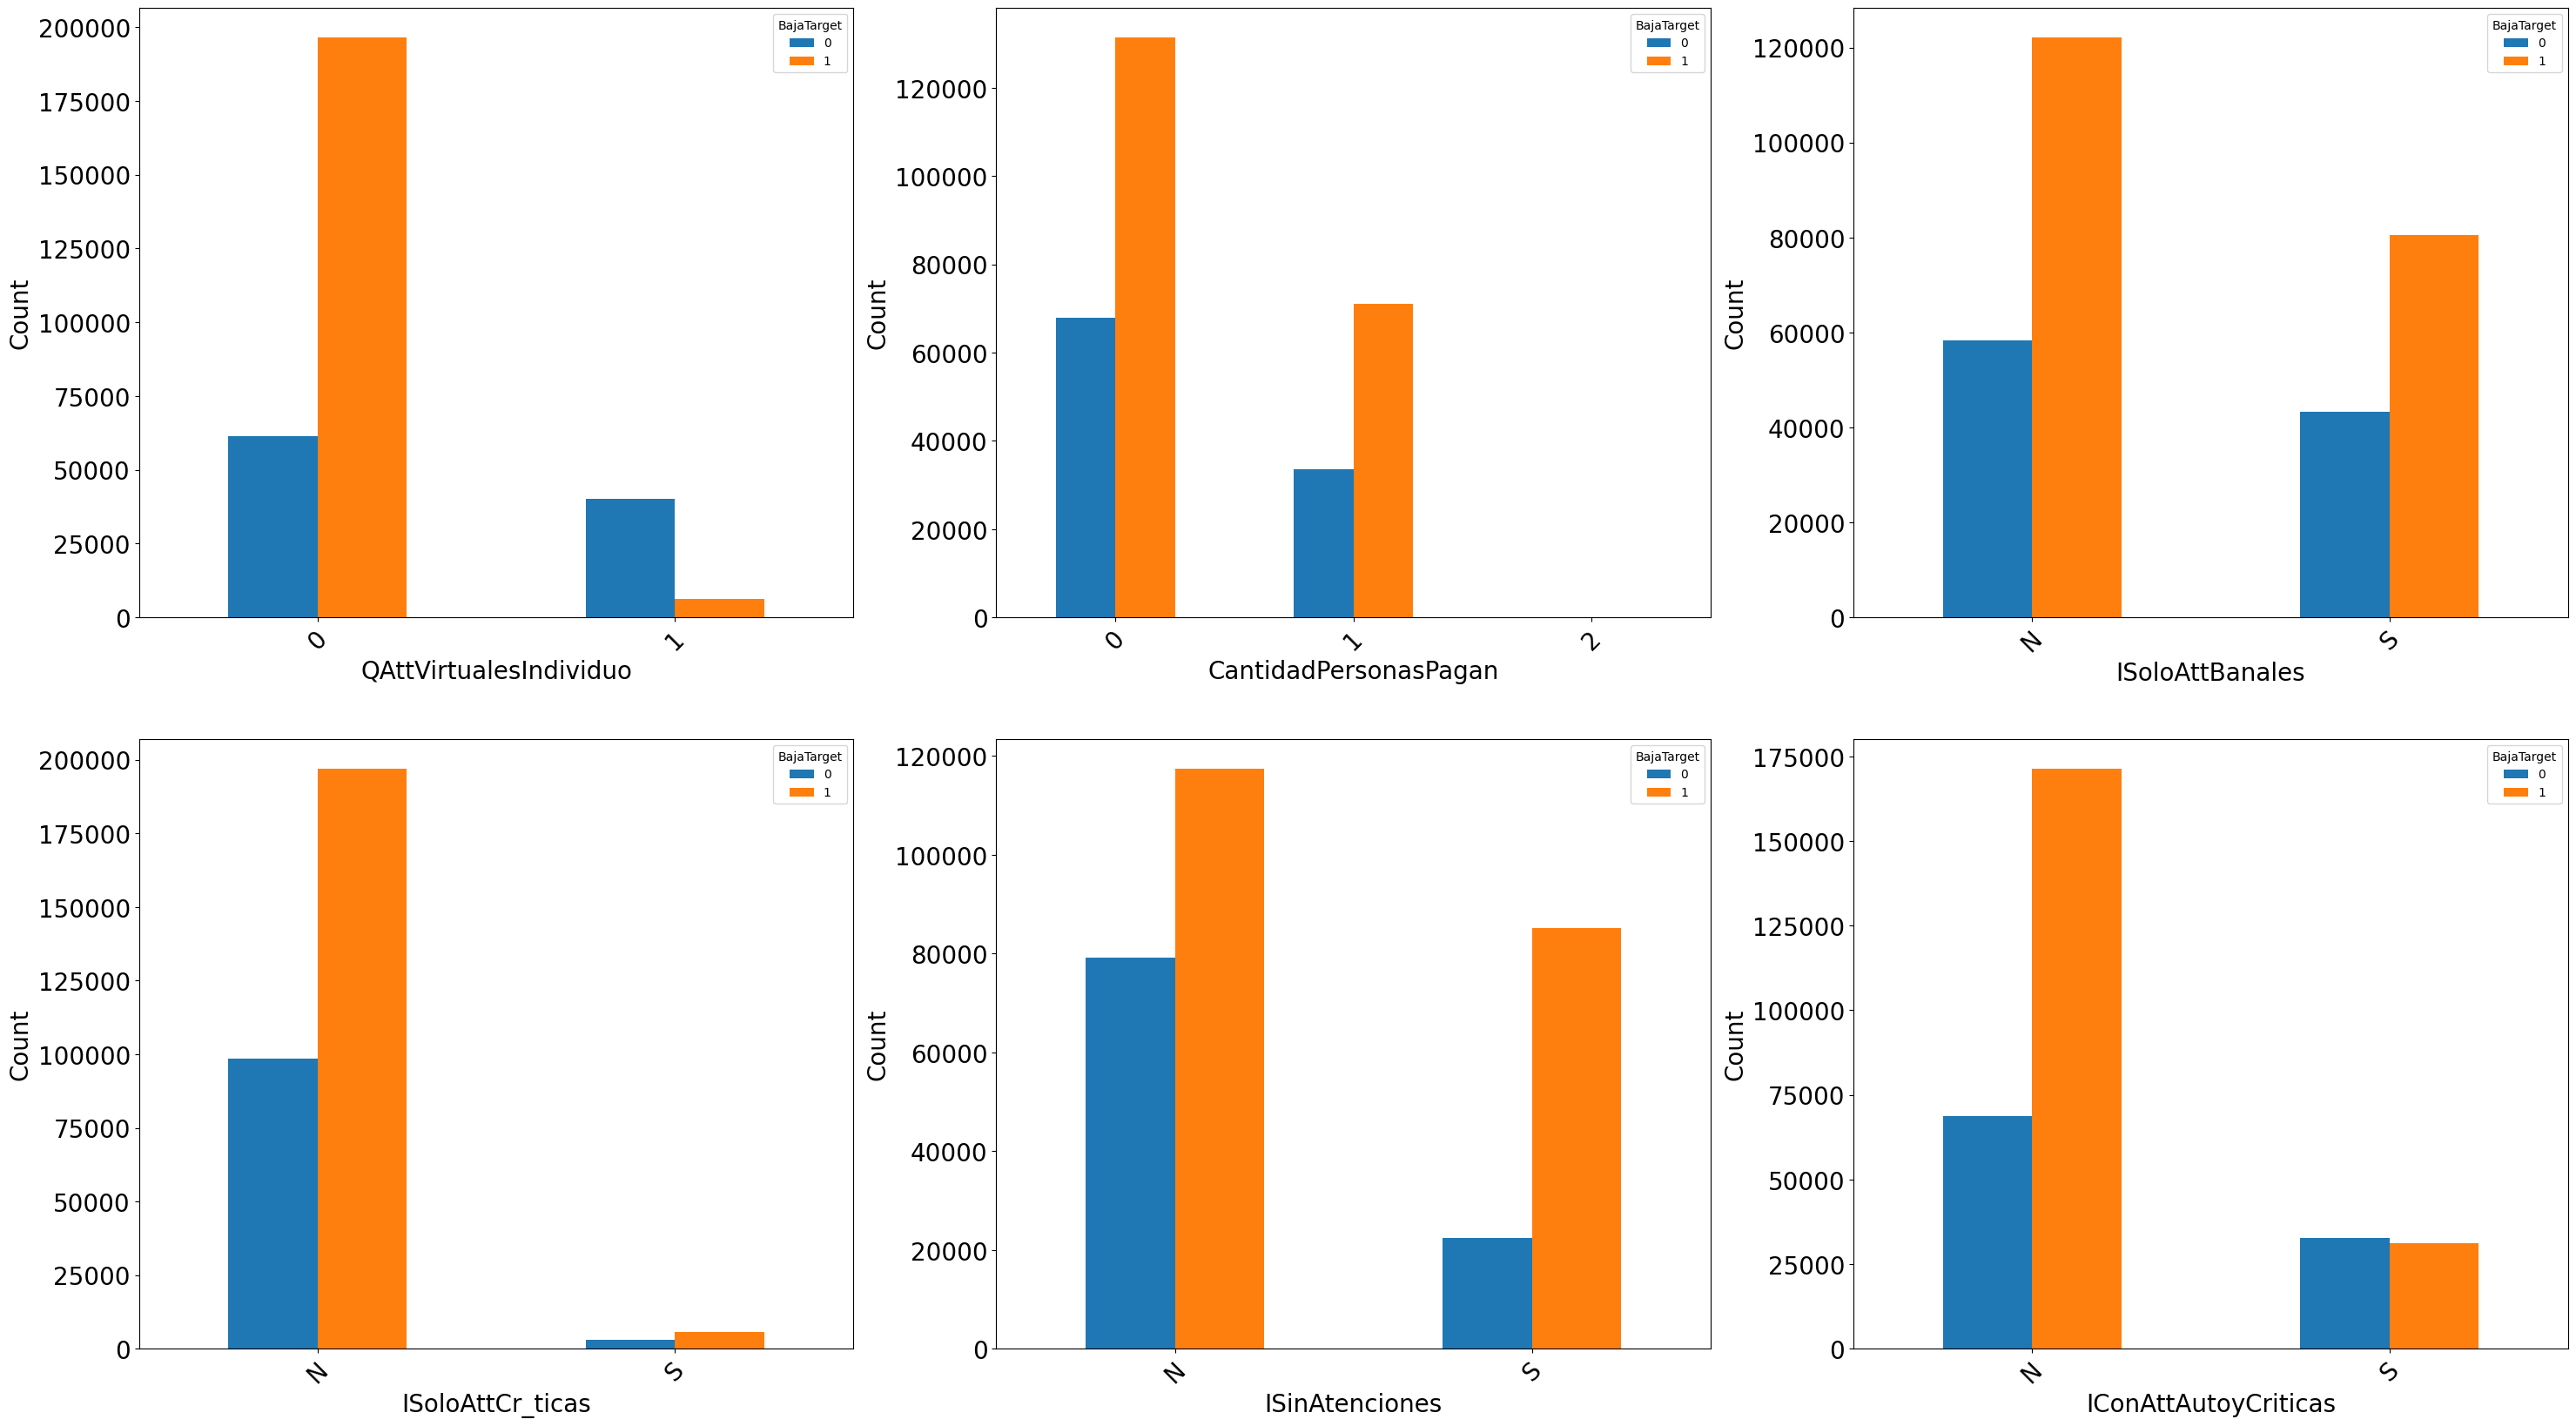

In [48]:
categorical_feature_func(cat_cols[12:18], 'BajaTarget', df, 3)

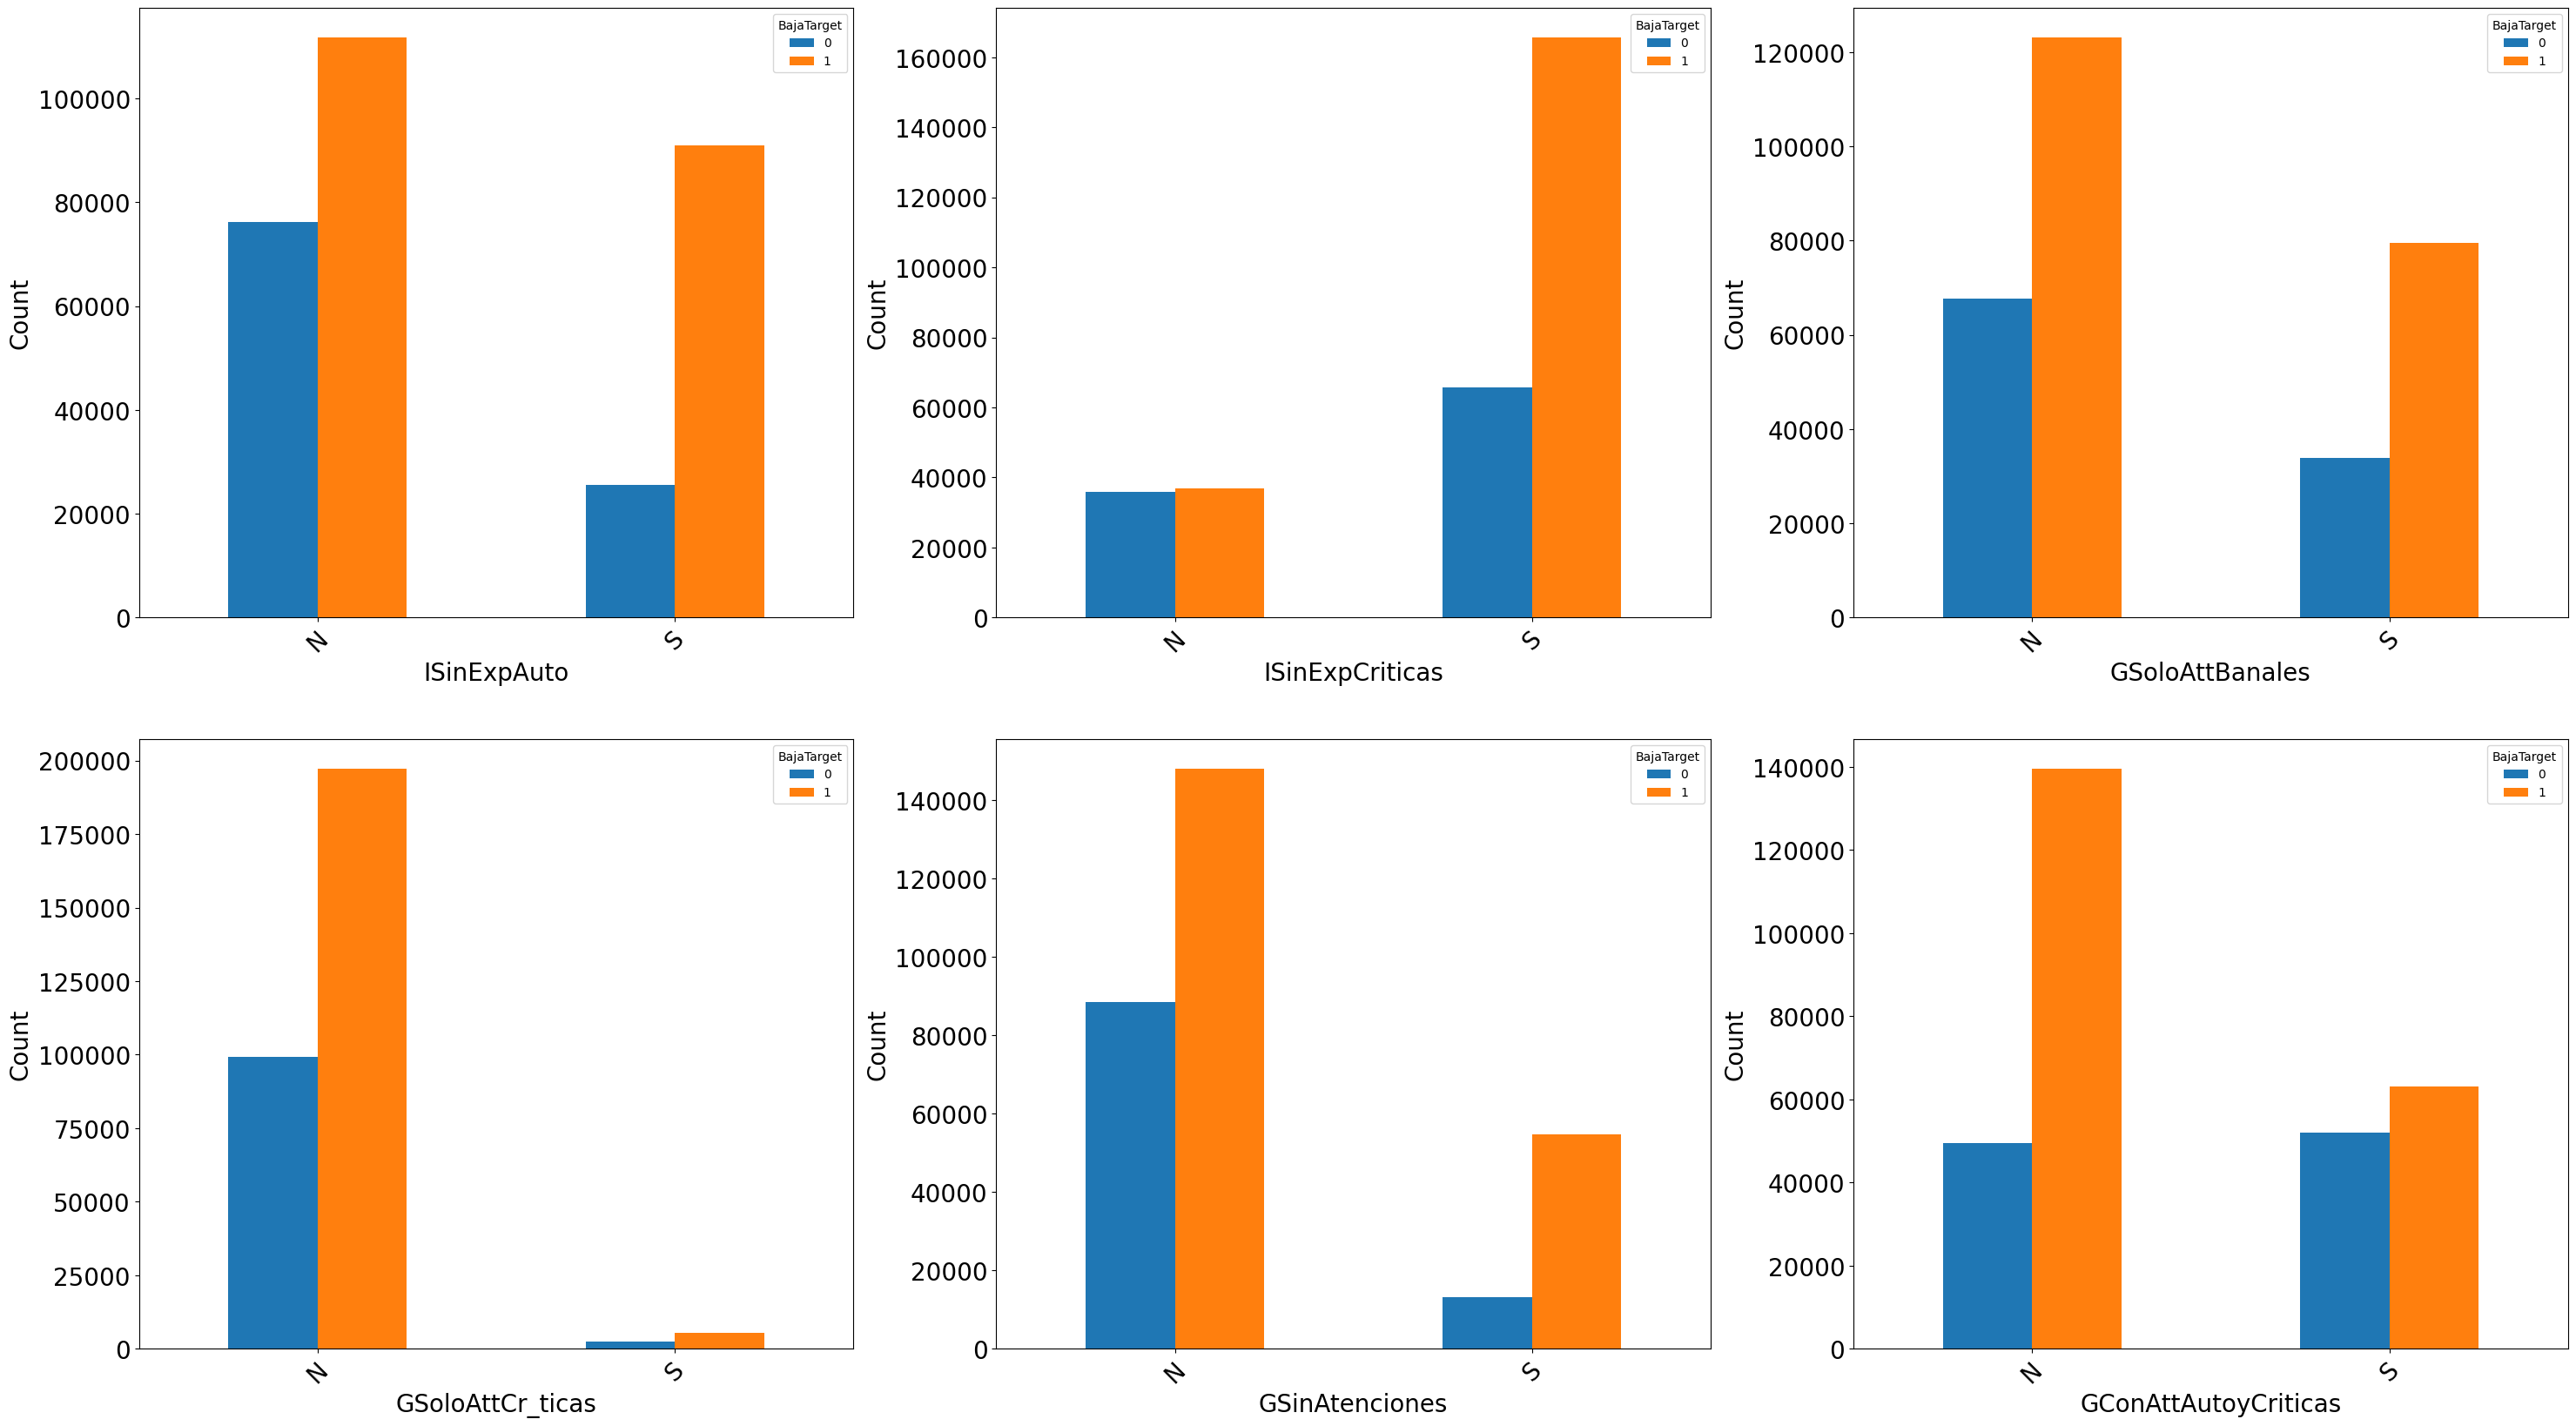

In [49]:
categorical_feature_func(cat_cols[18:24], 'BajaTarget', df, 3)

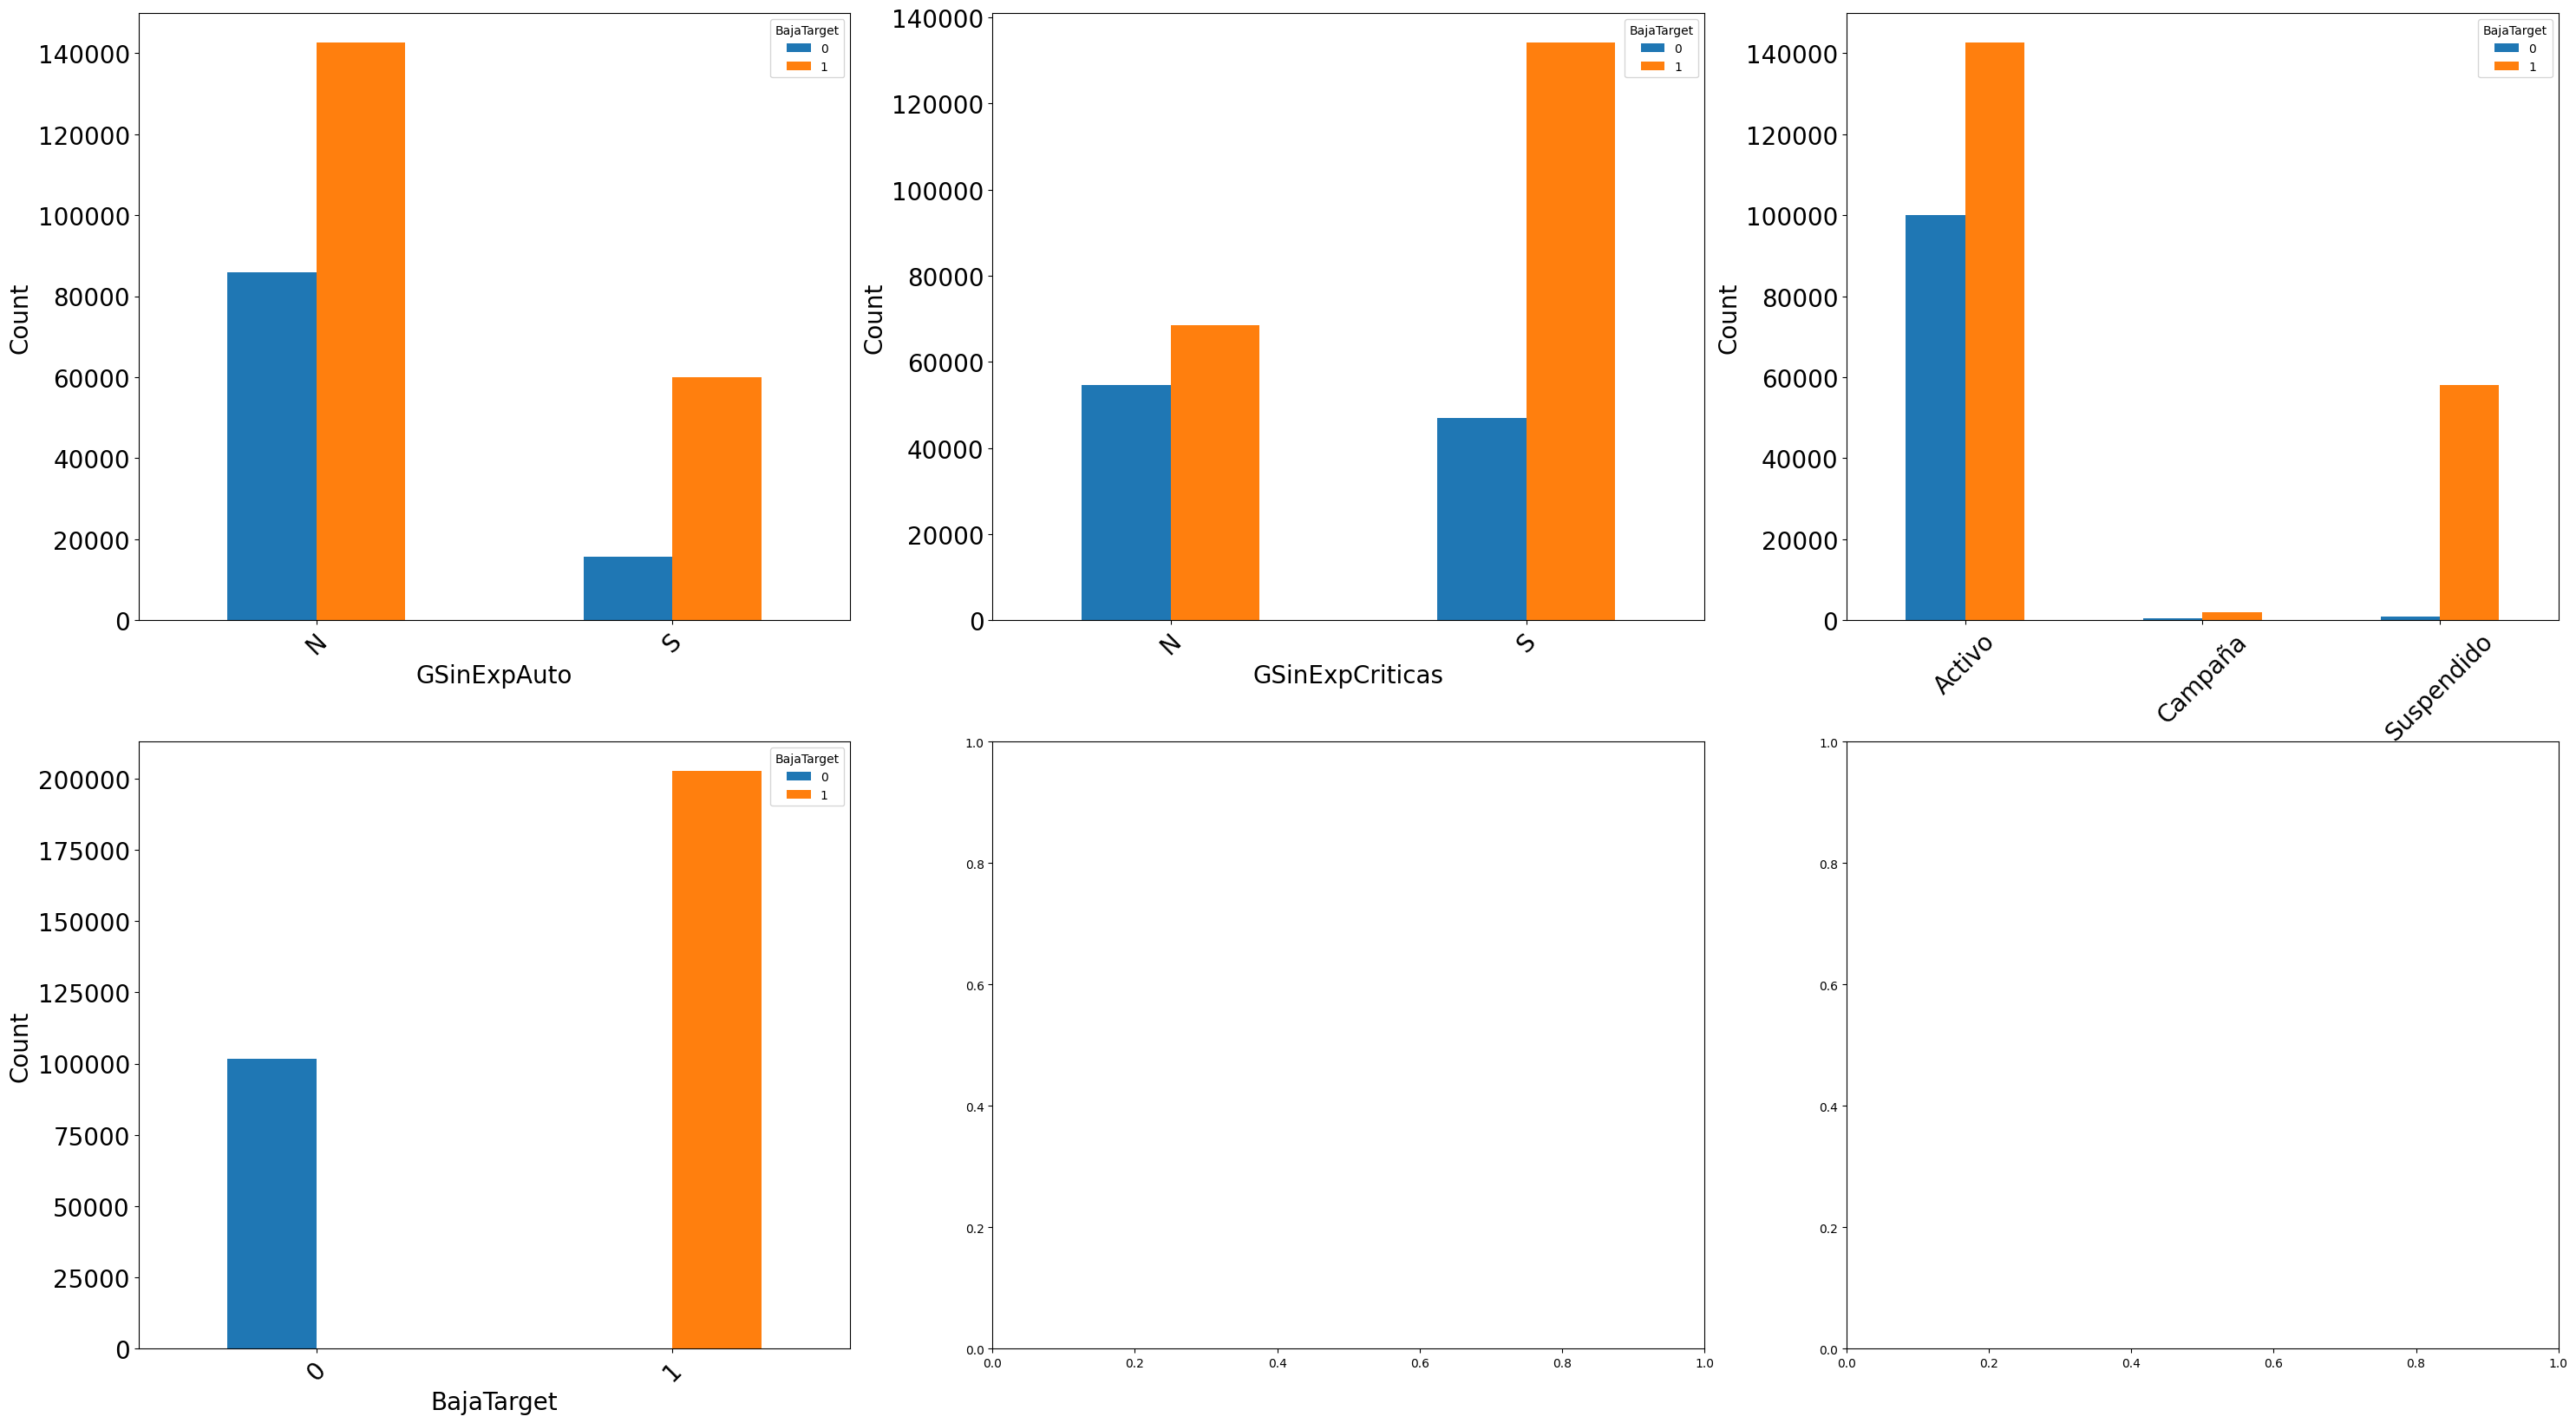

In [50]:
categorical_feature_func(cat_cols[24:], 'BajaTarget', df, 3)